In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.preprocessing import LabelEncoder

from scipy.stats import chi2_contingency 
#from preprocess import extra_features, separate
from pipelines import pipe, pipe2

In [3]:
train=pd.read_csv("../datasets/new_train.csv")
#train=extra_features(train)
#separate(train)

<IPython.core.display.Javascript object>

In [4]:
#drop = []
#for col in train.columns:
 #   if col not in ['total_nights', 'purpose', 'main_activity', 'tour_arrangement','travel_with', 'package_guided_tour']:
 #       drop.append(col)
#drop

In [5]:
X= train.drop(['cost_category', 'Tour_ID'], axis=1)
X.shape

(18506, 32)

In [6]:
y=train['cost_category']

In [7]:
col_drop=[]

for col in X.columns:
    
    ct=pd.crosstab(y, X[col])
    chi2, P, dof , _ = chi2_contingency(ct)
    
    if P >= 0.05:
        col_drop.append(col)
    elif chi2 <= 1000:
            col_drop.append(col)
        
    print(f"Column: {col}\nChi_Test: {chi2}\nP_Value: {P}\nDegree: {dof}\n*************")

<IPython.core.display.Javascript object>

Column: Unnamed: 0
Chi_Test: 92530.00000000003
P_Value: 0.4947449902995396
Degree: 92525
*************


<IPython.core.display.Javascript object>

Column: country
Chi_Test: 9401.22969371141
P_Value: 0.0
Degree: 300
*************


<IPython.core.display.Javascript object>

Column: age_group
Chi_Test: 1803.196457648891
P_Value: 0.0
Degree: 20
*************


<IPython.core.display.Javascript object>

Column: travel_with
Chi_Test: 4825.77958768553
P_Value: 0.0
Degree: 25
*************


<IPython.core.display.Javascript object>

Column: total_female
Chi_Test: 3135.1341596685616
P_Value: 0.0
Degree: 15
*************


<IPython.core.display.Javascript object>

Column: total_male
Chi_Test: 804.2466108839939
P_Value: 1.775590677605355e-157
Degree: 20
*************


<IPython.core.display.Javascript object>

Column: purpose
Chi_Test: 6975.312873617305
P_Value: 0.0
Degree: 35
*************


<IPython.core.display.Javascript object>

Column: main_activity
Chi_Test: 3606.50524881434
P_Value: 0.0
Degree: 40
*************


<IPython.core.display.Javascript object>

Column: info_source
Chi_Test: 4166.3943611855575
P_Value: 0.0
Degree: 35
*************


<IPython.core.display.Javascript object>

Column: tour_arrangement
Chi_Test: 8331.284428771029
P_Value: 0.0
Degree: 5
*************


<IPython.core.display.Javascript object>

Column: package_transport_int
Chi_Test: 5414.9841247089
P_Value: 0.0
Degree: 5
*************


<IPython.core.display.Javascript object>

Column: package_accomodation
Chi_Test: 7883.608233888307
P_Value: 0.0
Degree: 5
*************


<IPython.core.display.Javascript object>

Column: package_food
Chi_Test: 7146.769578021885
P_Value: 0.0
Degree: 5
*************


<IPython.core.display.Javascript object>

Column: package_transport_tz
Chi_Test: 6346.490489845604
P_Value: 0.0
Degree: 5
*************


<IPython.core.display.Javascript object>

Column: package_sightseeing
Chi_Test: 4501.574863783683
P_Value: 0.0
Degree: 5
*************


<IPython.core.display.Javascript object>

Column: package_guided_tour
Chi_Test: 4873.499054202309
P_Value: 0.0
Degree: 5
*************


<IPython.core.display.Javascript object>

Column: package_insurance
Chi_Test: 2067.872038967938
P_Value: 0.0
Degree: 5
*************


<IPython.core.display.Javascript object>

Column: night_mainland
Chi_Test: 4993.574894809394
P_Value: 0.0
Degree: 115
*************


<IPython.core.display.Javascript object>

Column: night_zanzibar
Chi_Test: 1902.0419921017688
P_Value: 0.0
Degree: 40
*************


<IPython.core.display.Javascript object>

Column: first_trip_tz
Chi_Test: 2229.180451768042
P_Value: 0.0
Degree: 5
*************


<IPython.core.display.Javascript object>

Column: total_nights
Chi_Test: 5637.712498230133
P_Value: 0.0
Degree: 150
*************


<IPython.core.display.Javascript object>

Column: tour_duration
Chi_Test: 5637.712498230133
P_Value: 0.0
Degree: 150
*************


<IPython.core.display.Javascript object>

Column: total_people
Chi_Test: 4481.239154927408
P_Value: 0.0
Degree: 35
*************


<IPython.core.display.Javascript object>

Column: av_tmale_per_tp
Chi_Test: 4481.239154927408
P_Value: 0.0
Degree: 35
*************


<IPython.core.display.Javascript object>

Column: av_tfemale_per_tp
Chi_Test: 4481.239154927408
P_Value: 0.0
Degree: 35
*************


<IPython.core.display.Javascript object>

Column: av_tp_per_purpose
Chi_Test: 6975.312873617304
P_Value: 0.0
Degree: 35
*************


<IPython.core.display.Javascript object>

Column: info_source & purpose
Chi_Test: 8490.143341971068
P_Value: 0.0
Degree: 245
*************


<IPython.core.display.Javascript object>

Column: mean_age_density_per_country
Chi_Test: 9673.65915401822
P_Value: 0.0
Degree: 525
*************


<IPython.core.display.Javascript object>

Column: mean_age_density_per_main_activity
Chi_Test: 3606.50524881434
P_Value: 0.0
Degree: 40
*************


<IPython.core.display.Javascript object>

Column: mean_age_density_per_info
Chi_Test: 4166.3943611855575
P_Value: 0.0
Degree: 35
*************


<IPython.core.display.Javascript object>

Column: dominant_gender
Chi_Test: 3035.429767588673
P_Value: 0.0
Degree: 10
*************


<IPython.core.display.Javascript object>

Column: av_stay_per_gender
Chi_Test: 3035.4297675886723
P_Value: 0.0
Degree: 10
*************


In [8]:
col_drop

['Unnamed: 0', 'total_male']

In [10]:
#X.loc[:, 'age_group_sqrt'] = X.age_group.apply(np.sqrt)
X.corr().T*100

,Unnamed: 0,age_group,total_female,total_male,night_mainland,night_zanzibar,total_nights,tour_duration,total_people,av_tmale_per_tp,av_tfemale_per_tp,av_tp_per_purpose,info_source & purpose,mean_age_density_per_country,mean_age_density_per_main_activity,mean_age_density_per_info,av_stay_per_gender
Unnamed: 0,100.000000,-0.217652,-0.981625,-0.563961,1.183625,0.260364,1.265310,1.265310,-1.115307,-1.024259,-1.174988,-0.007573,-0.507743,-1.084440,0.419684,-0.270853,-0.761313
age_group,-0.217652,100.000000,8.409811,0.729800,13.830332,-7.957662,9.447035,9.447035,6.614993,5.549499,7.476387,16.053674,17.496871,31.716640,19.541545,15.771007,10.521324
total_female,-0.981625,8.409811,100.000000,-3.707936,4.811092,24.015107,16.282994,16.282994,69.780012,66.952961,70.743155,36.955085,26.979974,18.012428,6.765221,19.622937,70.065051
total_male,-0.563961,0.729800,-3.707936,100.000000,-3.384140,7.882583,0.568595,0.568595,68.992597,69.988201,66.284384,7.798315,7.963056,-6.229813,1.723720,6.334085,-38.076974
night_mainland,1.183625,13.830332,4.811092,-3.384140,100.000000,-17.286378,87.838776,87.838776,1.059347,1.701097,0.412829,12.813799,6.998298,31.331043,26.543350,3.588157,3.155008
night_zanzibar,0.260364,-7.957662,24.015107,7.882583,-17.286378,100.000000,31.891210,31.891210,23.046137,19.690056,25.703385,33.340812,20.674372,-1.566558,-12.446340,14.999834,24.914074
total_nights,1.265310,9.447035,16.282994,0.568595,87.838776,31.891210,100.000000,100.000000,12.202605,11.191590,12.869919,28.509098,16.766574,29.388762,19.502250,10.731504,15.125621
tour_duration,1.265310,9.447035,16.282994,0.568595,87.838776,31.891210,100.000000,100.000000,12.202605,11.191590,12.869919,28.509098,16.766574,29.388762,19.502250,10.731504,15.125621
total_people,-1.115307,6.614993,69.780012,68.992597,1.059347,23.046137,12.202605,12.202605,100.000000,98.665781,98.756472,32.359172,25.251504,8.582368,6.136115,18.754605,23.460566
av_tmale_per_tp,-1.024259,5.549499,66.952961,69.988201,1.701097,19.690056,11.191590,11.191590,98.665781,100.000000,94.879294,27.839737,21.827021,6.756386,5.737721,16.206983,15.870905


In [12]:
#X.drop(columns= col_drop, inplace=True)
#from preprocess import separate
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.feature_extraction import DictVectorizer
import pandas as pd

cat=[]
text=[]
for col in X.select_dtypes(['object', 'category']).columns:
    if col not in ['cost_category']:
        num_values=len(X[col].unique())

        if num_values<=20:
            cat.append(col)
        else:
            text.append(col)
num= [col for col in X.select_dtypes('int','float').columns]

num_pipeline=Pipeline([
    ("imputer", KNNImputer(n_neighbors=3)),
    ("scaler", StandardScaler()),
])

cat_pipeline=Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(sparse_output=False)),
])

text_pipeline=Pipeline([
    ("vectorizer",OneHotEncoder(sparse_output=False)),
])

pipe = ColumnTransformer([
    ("cat", cat_pipeline, cat),
    ("num", num_pipeline, num),
    ("text", text_pipeline, text),
])




In [13]:
X=pipe2(X)
X.shape

(18506, 77)

In [14]:
le=LabelEncoder()
y=le.fit_transform(y)

In [36]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

print(f"X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}")

X_train: (14804, 77)
X_test: (3702, 77)
y_train: (14804,)
y_test: (3702,)


In [16]:
X

array([[-0.00796989,  2.08707419, -1.53474561, ..., -0.02941654,
        -0.20047159, -0.17826851],
       [ 1.06080381, -0.43594552,  0.92023714, ..., -0.02941654,
        -0.20047159, -0.17826851],
       [ 1.06080381, -0.43594552,  0.92023714, ..., -0.02941654,
        -0.20047159, -0.17826851],
       ...,
       [ 1.59519066, -0.43594552,  0.92023714, ..., -0.02941654,
        -0.20047159, -0.17826851],
       [ 1.06080381, -0.43594552, -0.61412708, ..., -0.02941654,
        -0.20047159, -0.17826851],
       [ 1.59519066,  2.08707419,  0.92023714, ..., -0.02941654,
        -0.20047159, -0.17826851]])

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

estimators = list(range(100, 500, 50))
oob_score = []

lda = LDA()
#lda.fit(X_train, y_train)
#X_test = lda.transform(X_test)
for i in estimators:
    rf=RandomForestClassifier(n_estimators= i,
                          criterion = 'gini',
                          n_jobs=1,
                          max_depth= 4,
                          oob_score=True,
                          random_state=1)

    rf.fit(X_train, y_train)
    oob_score.append(rf.oob_score_)

In [31]:
oob_score

[0.48507160226965684,
 0.4813563901648203,
 0.4810861929208322,
 0.4837206160497163,
 0.48216698189678464,
 0.4823020805187787,
 0.48068089705485006,
 0.4811537422318292]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Error rate.')

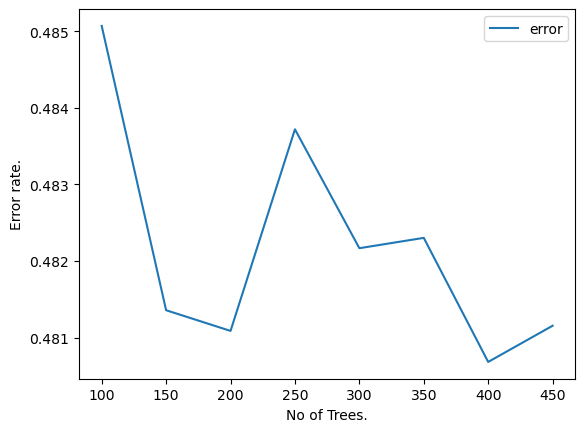

In [32]:
error = pd.DataFrame({'estimator':estimators,
                     'error': oob_score})
error.plot(x='estimator', y='error')
plt.xlabel('No of Trees.')
plt.ylabel('Error rate.')

In [37]:
X_test.shape

(3702, 77)

In [38]:
y_pred=rf.predict(X_test)

print(classification_report(y_pred, y_test, zero_division=0, target_names=le.classes_))

              precision    recall  f1-score   support

   High Cost       0.07      0.53      0.12        92
 Higher Cost       0.88      0.50      0.64      1720
Highest Cost       0.00      0.00      0.00         0
    Low Cost       0.00      0.00      0.00         0
  Lower Cost       0.14      0.82      0.24        87
 Normal Cost       0.75      0.46      0.57      1803

    accuracy                           0.49      3702
   macro avg       0.31      0.38      0.26      3702
weighted avg       0.78      0.49      0.58      3702



In [109]:
#np.random.permutation(xt.columns.values)

In [39]:
#text = pipe.transformers_[2][1].get_feature_names_out().tolist()
cat = pipe.transformers_[1][1].get_feature_names_out().tolist()
num = pipe.transformers_[0][1].get_feature_names_out().tolist()
columns =  cat +num

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [111]:
x_test = pd.DataFrame(X_test, columns=columns)
x_test

,total_nights,travel_with_Alone,travel_with_With Children,travel_with_With Other Friends/Relatives,travel_with_With Spouse,travel_with_With Spouse and Children,purpose_Business,purpose_Leisure and Holidays,purpose_Medical,purpose_Meetings and Conference,...,main_activity_Conference Tourism,main_activity_Cultural Tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting Tourism,main_activity_Mountain Climbing,main_activity_Wildlife Tourism,tour_arrangement_Independent,tour_arrangement_Package Tour,package_guided_tour_No,package_guided_tour_Yes
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-0.591880
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.230643
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.162099
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.523336
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-0.454793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.386249
3698,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.386249
3699,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.523336
3700,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.317706


In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score
scores = []
for _ in range(3):
    preds = rf.predict_proba(X_test)
    accuracy = roc_auc_score(y_test, preds)
    
    
    for c in .columns:
        X_t = x_test.copy()
        X_t.columns = np.random.permutation(X_t.columns.values)
        shuffled_acc = accuracy_score(y_test, rf.predict(X_test))
        scores.append(accuracy - shuffled_acc/accuracy)

NameError: name 'xt' is not defined

In [112]:
pipe.transformers_[0][1][0].get_feature_names_out()

array(['travel_with', 'purpose', 'main_activity', 'tour_arrangement',
       'package_guided_tour'], dtype=object)

In [113]:
imp = np.argsort(rf.feature_importances_)[::-1]
imp

<IPython.core.display.Javascript object>

array([26, 23, 22,  6,  0, 24, 25, 21,  3,  4,  5, 11, 13, 19, 16,  2, 17,
        8,  9, 12,  1, 10, 20, 15, 14, 18,  7], dtype=int64)

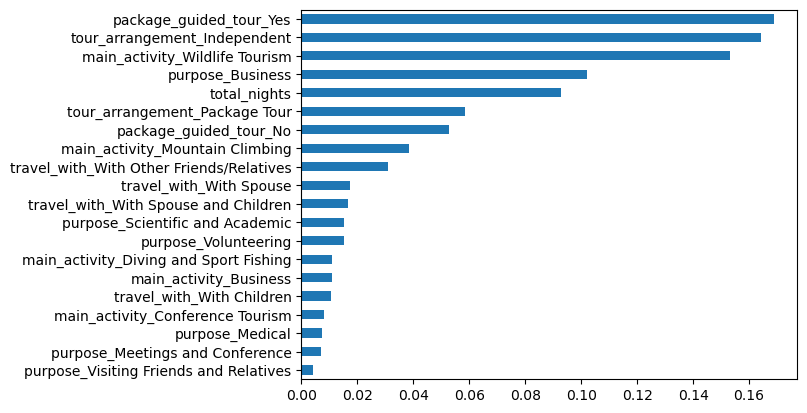

In [114]:
f_importances = pd.Series(rf.feature_importances_, index=columns)
f_importances.nlargest(20).plot(kind='barh').invert_yaxis();

In [116]:
from sklearn.inspection import permutation_importance
#import shap

perm_imp = permutation_importance(rf, X_test, y_test)
sorted_imp = perm_imp.importances_mean.argsort()
sorted_imp

array([20,  7, 15,  5, 14, 12, 10, 18, 17,  1,  9, 13, 16,  2,  8, 11,  4,
       19, 24,  3, 21, 25,  6,  0, 22, 23, 26], dtype=int64)

<IPython.core.display.Javascript object>

<BarContainer object of 27 artists>

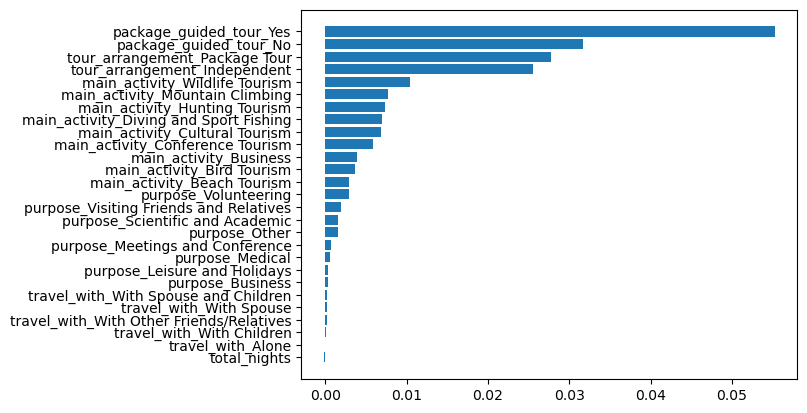

In [121]:
plt.barh(columns, perm_imp.importances_mean[sorted_imp])

<IPython.core.display.Javascript object>

 1) package_guided_tour_Yes        0.168798
 2) tour_arrangement_Independent   0.164386
 3) main_activity_Wildlife Tourism 0.153312
 4) purpose_Business               0.101944
 5) total_nights                   0.092914
 6) tour_arrangement_Package Tour  0.058336
 7) package_guided_tour_No         0.052804
 8) main_activity_Mountain Climbing 0.038617
 9) travel_with_With Other Friends/Relatives 0.031056
10) travel_with_With Spouse        0.017328
11) travel_with_With Spouse and Children 0.016494
12) purpose_Scientific and Academic 0.015389
13) purpose_Volunteering           0.015138
14) main_activity_Diving and Sport Fishing 0.011128
15) main_activity_Business         0.011086
16) travel_with_With Children      0.010636
17) main_activity_Conference Tourism 0.008013
18) purpose_Medical                0.007216
19) purpose_Meetings and Conference 0.007166
20) purpose_Visiting Friends and Relatives 0.004342
21) travel_with_Alone              0.004342
22) purpose_Other                  0.00

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TypeError: only integer scalar arrays can be converted to a scalar index

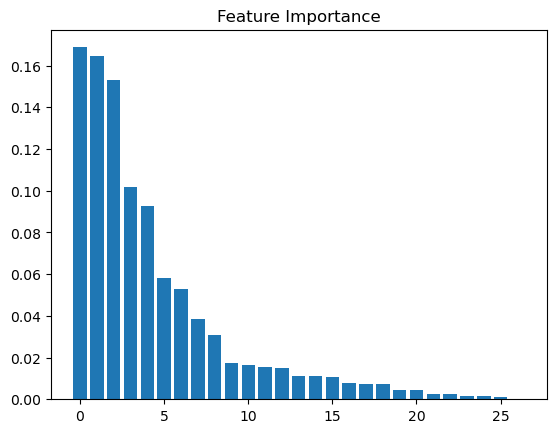

In [123]:
importances = rf.feature_importances_

feat_labels = columns
indices = np.argsort(importances)[::-1]


for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
           importances[indices],
           align='center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])

plt.tight_layout()
plt.show();

In [60]:
importances = rf.feature_importances_
indices = columns

for i, idx in zip(importances, indices):
    print(i, idx)

0.02573781011849245 age_group_18-24
0.02330020765718791 age_group_25-44
0.02639651919292158 age_group_45-64
0.029411357502308725 age_group_65+
0.0027135563323146357 age_group_<18
0.05254280174443006 purpose_Business
0.1336925871824696 purpose_Leisure and Holidays
0.0005131279252922581 purpose_Medical
0.016178126287332346 purpose_Meetings and Conference
0.012771569856468483 purpose_Other
0.004337977270676546 purpose_Scientific and Academic
0.033621343151698825 purpose_Visiting Friends and Relatives
0.00787582736812354 purpose_Volunteering
0.018155612197611772 main_activity_Beach Tourism
0.002045815337975389 main_activity_Bird Tourism
0.0019076084348366104 main_activity_Business
0.011648575651786145 main_activity_Conference Tourism
0.010954754335191153 main_activity_Cultural Tourism
0.0009738797576208409 main_activity_Diving and Sport Fishing
0.025208760619034105 main_activity_Hunting Tourism
0.004141358781440387 main_activity_Mountain Climbing
0.062424658212492774 main_activity_Wildlife

In [54]:
data

,score
152,0.000000
96,0.000000
120,0.000000
122,0.000000
126,0.000000
...,...
40,0.047894
5,0.050713
63,0.059587
39,0.060290
